In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline

# Fever

## Problem Statement:
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [2]:
# Importing data from CSV
fever_df = pd.read_csv('Fever.csv')

## Descriptive Analytics
-----

In [3]:
# Check if data is imported properly
fever_df

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6
5,1,2,2,4.2
6,1,2,3,4.9
7,1,2,4,4.7
8,1,3,1,4.8
9,1,3,2,4.5


In [4]:
# Checking the first 10 entries
fever_df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [5]:
# Finding the total number of rows and columns in the data
fever_df.shape

(36, 4)

In [6]:
# Finding the number of missing values and the data types of the variables
fever_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [7]:
# Since A and B are categorical variables and mentioned as int we convert them to Categorical
fever_df['A'] = pd.Categorical(fever_df['A'])
fever_df['B'] = pd.Categorical(fever_df['B'])

In [8]:
# Finding the details for the categorical variables A and B
fever_df.describe(include='category').T

,count,unique,top,freq
A,36,3,3,12
B,36,3,3,12


In [9]:
# Finding unique entries and their counts for A and B
fever_df['A'].value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [10]:
fever_df['B'].value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [11]:
# Re check if data type is converted
fever_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          36 non-null     category
 1   B          36 non-null     category
 2   Volunteer  36 non-null     int64   
 3   Relief     36 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 984.0 bytes


In [12]:
# Finding the details for Relief variable
fever_df['Relief'].describe()

count    36.000000
mean      7.183333
std       3.272090
min       2.300000
25%       4.675000
50%       6.000000
75%       9.325000
max      13.500000
Name: Relief, dtype: float64

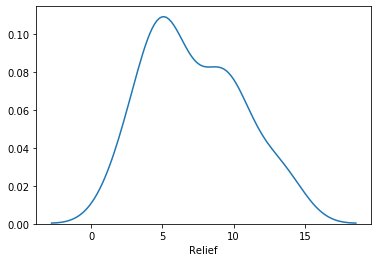

In [13]:
# Finding the distribution of Relief variable
sns.distplot(fever_df['Relief'], hist=False)

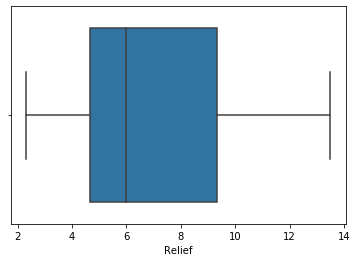

In [14]:
# Looking for outliers
sns.boxplot(fever_df['Relief'])

### Findings:
1. Column headers are 'A', 'B', 'Volunteer' and 'Relief'
2. There are 36 entries (rows) and 4 variables (columns)
3. The data types of the variables are: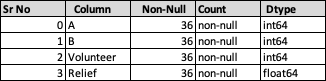
4. There are no missing values
5. A and B variables have 3 categories each with 12 observations in each of the categories
6. The variable Relief is slightly right skewed
7. There are no outliers in the Relief variable

# --------------------------------------------------------------------------

### Question 1:

State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

The Hypothesis for Compund A:
* $H_0$: $\mu_{A1} $ = $\mu_{A2}$ = $\mu_{A3}$  (The means of fever for each of the level in compound A are equal)
* $H_a$: $\mu_{A1} $ = $\mu_{A2}$ $\neq$ $\mu_{A3}$ or $\mu_{A1} $ $\neq$ $\mu_{A2}$ $\neq$ $\mu_{A3}$ or $\mu_{A1} $ $\neq$ $\mu_{A2}$ = $\mu_{A3}$ (There is at least one level has a mean different compared to the other two in compound A)

The Hypothesis for Compund B:
* $H_0$: $\mu_{B1} $ = $\mu_{B2}$ = $\mu_{B3}$  (The means of fever for each of the level in compound A are equal)
* $H_b$: $\mu_{B1} $ = $\mu_{B2}$ $\neq$ $\mu_{B3}$ or $\mu_{B1} $ $\neq$ $\mu_{B2}$ $\neq$ $\mu_{B3}$ or $\mu_{B1} $ $\neq$ $\mu_{B2}$ = $\mu_{B3}$ (There is at least one level has a mean different compared to the other two in compound A)

# ------------------------------------------------------------------------

### Question 2:

Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

The Hypothesis for Compund A:
* $H_0$: $\mu_{A1} $ = $\mu_{A2}$ = $\mu_{A3}$  (The means of fever for each of the level in compound A are equal)
* $H_a$: $\mu_{A1} $ = $\mu_{A2}$ $\neq$ $\mu_{A3}$ or $\mu_{A1} $ $\neq$ $\mu_{A2}$ $\neq$ $\mu_{A3}$ or $\mu_{A1} $ $\neq$ $\mu_{A2}$ = $\mu_{A3}$ (There is at least one level has a mean different compared to the other two in compound A)

In [15]:
# One way ANOVA for Compound A
formula_A = 'Relief ~ C(A)'
model_A = ols(formula=formula_A, data=fever_df).fit()
one_anova_A = anova_lm(model_A)
one_anova_A

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.02,110.010000,23.465387,4.578242e-07
Residual,33.0,154.71,4.688182,NaN,NaN


P=4.578242e-07

Since P < 0.05, we can reject the null hypothesis.

Considering a confidence ratio of 95% we can say that the means for fever for each amount level of compound A are not equal. 

Therefore, we can say that the means for each level in compound A are not equal.

# ------------------------------------------------------------------------

### Question 3:

Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

The Hypothesis for Compund B:
* $H_0$: $\mu_{B1} $ = $\mu_{B2}$ = $\mu_{B3}$  (The means of fever for each of the level in compound A are equal)
* $H_b$: $\mu_{B1} $ = $\mu_{B2}$ $\neq$ $\mu_{B3}$ or $\mu_{B1} $ $\neq$ $\mu_{B2}$ $\neq$ $\mu_{B3}$ or $\mu_{B1} $ $\neq$ $\mu_{B2}$ = $\mu_{B3}$ (There is at least one level has a mean different compared to the other two in compound A)

In [16]:
# One way ANOVA for Compound B
formula_B = 'Relief ~ C(B)'
model_B = ols(formula=formula_B, data=fever_df).fit()
one_anova_B = anova_lm(model_B)
P=one_anova_B

P=0.00135

Since P < 0.05, we can reject the null hypothesis.

Considering a confidence ratio of 95% we can say that the means for fever for each amount level of compound B are not equal.

Therefore, we can say that the means for each level in compound B are not equal.
# ------------------------------------------------------------------------

### Question 4:

Analyse the effects of one variable on another with the help of an interaction plot.
What is the interaction between the two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

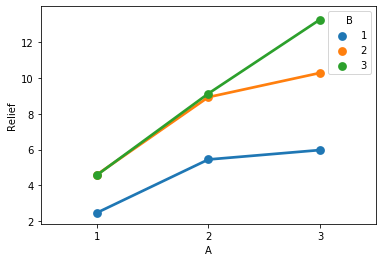

In [17]:
# Plotting the point plot without confidence interval
sns.pointplot(x=fever_df['A'], y=fever_df['Relief'], hue=fever_df['B'], ci=False)

### Findings:

1.	On overview the order of relief is as follows for both the compounds: 1 < 2 < 3
2.	With increase in levels in compound A, all levels of compound B increase in relief.
3.	Levels 1 and 2 of compound B, for all levels in compound A, show almost similar behaviour with respect to relief.
4.	Level 3 of compound B shows the same character till level 2 of compound A but however, after that it continues to increase while the other two levels tend to saturate in relief.
5.	There is not much interaction between level 1 and 2 across levels in compound A. While level 3 of compound B shows considerable interaction with the remaining 2 levels of compound B.
6.	Overall there is a considerable amount of interaction. We will verify statistically in the next question if this interaction is considerable enough.

# ------------------------------------------------------------------------

### Question 5:

Analyse the effects of one variable on another with the help of an interaction plot.
What is the interaction between the two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

The Hypothesis for compound A:
* $H_0$: $\mu_{A1} $ = $\mu_{A2}$ = $\mu_{A3}$  (The means of fever for each of the level in compound A are equal)
* $H_a$: $\mu_{A1} $ = $\mu_{A2}$ $\neq$ $\mu_{A3}$ or $\mu_{A1} $ $\neq$ $\mu_{A2}$ $\neq$ $\mu_{A3}$ or $\mu_{A1} $ $\neq$ $\mu_{A2}$ = $\mu_{A3}$ (There is at least one level has a mean different compared to the other two in compound A)

The Hypothesis for Compund B:
* $H_0$: $\mu_{B1} $ = $\mu_{B2}$ = $\mu_{B3}$  (The means of fever for each of the level in compound A are equal)
* $H_b$: $\mu_{B1} $ = $\mu_{B2}$ $\neq$ $\mu_{B3}$ or $\mu_{B1} $ $\neq$ $\mu_{B2}$ $\neq$ $\mu_{B3}$ or $\mu_{B1} $ $\neq$ $\mu_{B2}$ = $\mu_{B3}$ (There is at least one level has a mean different compared to the other two in compound A)

The hypothesis for interaction betwewn compund A and B:
* $H_0$: There is no interaction effect of Compound A and Compound B on Relief.
* $H_{A:B}$: There is interaction effect of Compound A and Compound B on Relief.

In [18]:
# Two way ANOVA of compound A and compound B with interaction between the 2
formula_AB = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model_AB = ols(formula=formula_AB, data=fever_df).fit()
one_anova_AB = anova_lm(model_AB)
one_anova_AB

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.020,110.010000,1827.858462,1.514043e-29
C(B),2.0,123.660,61.830000,1027.329231,3.348751e-26
C(A):C(B),4.0,29.425,7.356250,122.226923,6.972083e-17
Residual,27.0,1.625,0.060185,NaN,NaN


P[C(A)] = 1.514043e-29

P[C(B)] = 3.348751e-26

P[C(A):C(B)] = 6.972083e-17

- Compound A has a significant effect on Relief
- Compound B has a significant effect on Relief
- At 95% confidence, we can say that there is interaction between the compounds.

In [19]:
# Upon adjusting for Type III error (since there is interaction):
formula_AB_adj = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model_AB_adj = ols(formula=formula_AB_adj, data=fever_df).fit()
one_anova_AB_adj = anova_lm(model_AB_adj, type=3)
one_anova_AB_adj

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.020,110.010000,1827.858462,1.514043e-29
C(B),2.0,123.660,61.830000,1027.329231,3.348751e-26
C(A):C(B),4.0,29.425,7.356250,122.226923,6.972083e-17
Residual,27.0,1.625,0.060185,NaN,NaN


# ------------------------------------------------------------------------

### Question 6:

Mention the business implications of performing ANOVA for this particular case study.

1.	On overview the order of relief is as follows for both the compounds: 1 < 2 < 3
2.	With increase in levels in compound A, all levels of compound B increase in relief.
3.	Levels 1 and 2 of compound B, for all levels in compound A, show almost similar behaviour with respect to relief.
4.	Level 3 of compound B shows the same character till level 2 of compound A but however, after that it continues to increase while the other two levels tend to saturate in relief.
5.	There is not much interaction between level 1 and 2 across levels in compound A. While level 3 of compound B shows considerable interaction with the remaining 2 levels of compound B.
6.	Overall there is a considerable amount of interaction. We will verify statistically in the next question if this interaction is considerable enough.
7. Compound A has a significant effect on Relief
8. Compound B has a significant effect on Relief
9. At 95% confidence, we can say that there is interaction between the compounds.

**Business Implications on this case study are:**
-	The data collected at each level is equal and the experiment design has been conducted in a fairly random and appropriate manner.
-	Compound A has a comparatively higher effect on the relief compared to compound B.
-	Across all levels of compound B, relief for level 3 is greater than level 2 than level1 in compound A.
-	Across all levels of A, levels 1 and 2 of compound B perform similarly. However, level 3 in compound B shows same results as level 2 in compound B until level 2 in compound A but for level 3 in compound A and B there is an abrupt increase in relief.
-	This abruptly high relief is what may be causing the relief to skew slightly to the right. This needs special attention and more study so as to be proven to be more consistent.
-	If proven consistent, the combination of Level 3 of compound A and B can be used to give high relief and the combination of Level 1 of compound A and B can be used to give every mild relief. All other combinations provide intermediate relief.

# ------------------------------------------------------------------------